In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
print("Done")

Done


In [20]:
from main_classes.voltage_maps import VoltageMapCollection
from main_classes.epsilon_cover import BasicCoverTree, run_cover_properties_test, estimate_span
from utilities.generate_toy_data import generate_2D_plane
print("DONE")

DONE


### Load data

In [21]:
data = generate_2D_plane(datasize=2000)
print(data.shape)

(10000, 2)


### Build epsilon covers

In [22]:
init_radius = estimate_span(data)
epsilon_cover_factory = BasicCoverTree(init_radius)
for x in data:
    epsilon_cover_factory.insert(x)
print("DONE")

DONE


##### Estimate densities

In [23]:
data_density_estimation = generate_2D_plane(datasize=10000)
densities = epsilon_cover_factory.estimate_densities(data_density_estimation)
print("Densities lvl 1: ", densities[1])
print("Densities lvl 2: ", densities[2])
print("Densities lvl 3: ", densities[3])
print("DONE")

Densities lvl 1:  [0.4434 0.3051 0.2515]
Densities lvl 2:  [0.172  0.095  0.1193 0.0691 0.0804 0.0773 0.0258 0.0755 0.0565 0.0422
 0.0341 0.0705 0.0398 0.0425]
Densities lvl 3:  [0.0441 0.0215 0.0112 0.0377 0.0264 0.0287 0.03   0.0341 0.0238 0.0153
 0.0184 0.0091 0.0276 0.0183 0.0171 0.0085 0.0182 0.0205 0.0249 0.0276
 0.038  0.0225 0.0172 0.0133 0.0091 0.021  0.0377 0.0215 0.0216 0.0348
 0.0126 0.0191 0.0174 0.0165 0.0284 0.0259 0.0135 0.0164 0.0212 0.0137
 0.0116 0.0171 0.0142 0.0154 0.0177 0.019  0.0206]
DONE


Plot level 1
Number of centers lvl 1 = 2
Plot level 2
Number of centers lvl 2 = 9
Plot level 3
Number of centers lvl 3 = 44
Plot level 4
Number of centers lvl 4 = 158
Plot level 5
Number of centers lvl 5 = 464


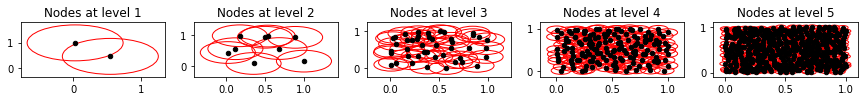

In [18]:
%matplotlib inline
epsilon_reduce_factor = 2
indices = [0, 1]
centers_dict = epsilon_cover_factory.get_centers()

max_lvl = min(5, len(centers_dict))
fig, axes = plt.subplots(1, max_lvl, figsize=(15, 1))
for i, lvl in enumerate(range(1, max_lvl+1)):
    centers = centers_dict[lvl]
    print(f'Plot level {lvl}')
    print(f'Number of centers lvl {lvl} = {len(centers)}')
    radius = init_radius / (epsilon_reduce_factor ** lvl)
    for center in centers:
        axes[i].set_title(f'Nodes at level {lvl}')
        axes[i].add_patch(plt.Circle(tuple([center[indices[0]], center[indices[1]]]),
                                    radius=radius, color='r', fill=False))
        axes[i].scatter(center[indices[0]], center[indices[1]], s=20, c='k', marker='o', zorder=2)
plt.show()

### Construct voltage map collection and propagate voltages